In [258]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

hotel = pd.read_csv('./data_logistic.csv')
X = hotel.copy()
y = X.pop('c')

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.7, random_state=10)
input_shape = [X_train.shape[1]]

# 1) Define Model #

In [259]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=input_shape),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    layers.Dense(3, activation='relu'),    
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

c:\Users\cuong\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 2) Add Optimizer, Loss, and Metric #

In [260]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],   
)

In [261]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, # 0 to hide the output
)

Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.6412 - loss: 0.5931 - val_binary_accuracy: 0.7333 - val_loss: 0.5563
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6453 - loss: 0.5972 - val_binary_accuracy: 0.7000 - val_loss: 0.5602
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6508 - loss: 0.5790 - val_binary_accuracy: 0.7333 - val_loss: 0.5632
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.5910 - loss: 0.6303 - val_binary_accuracy: 0.7333 - val_loss: 0.5628
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7073 - loss: 0.5216 - val_binary_accuracy: 0.7333 - val_loss: 0.5566
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.5958 - loss: 0.5943 - val_binary_accuracy: 0.7333 - val_loss: 0.5574
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6843 - loss: 0.5682 - val_binary_accuracy: 0.7333 - val_loss: 0.5524
Epoch 

Best Validation Loss: 0.2361
Best Validation Accuracy: 0.9000


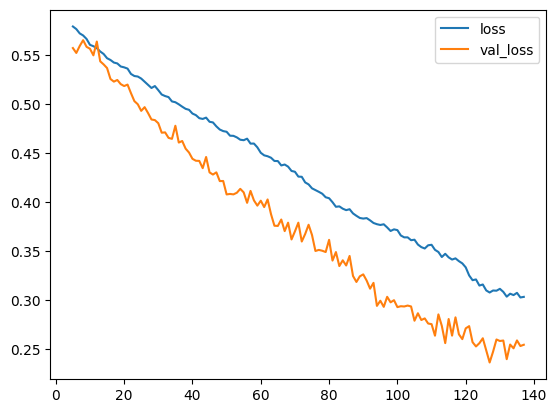

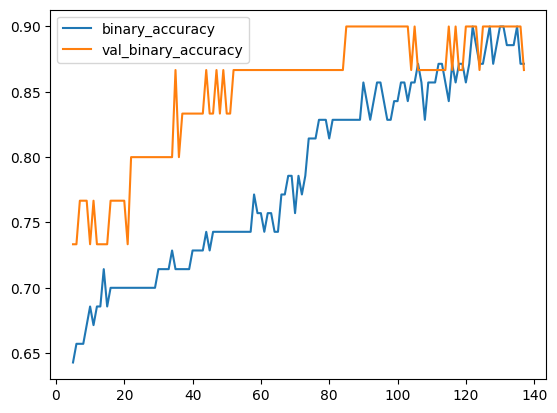

In [262]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

# 3) Predictions & Actual #

In [263]:
import numpy as np

# Dự đoán trên tập validation
y_pred = model.predict(X_valid)

# Áp đặt ngưỡng
threshold = 0.5

# Chuyển đổi dự đoán thành các nhãn nhị phân (0 hoặc 1)
binary_predictions = np.where(y_pred >= threshold, 1, 0)


# Tạo DataFrame từ binary_predictions và y_valid
df = pd.DataFrame({'Predictions': binary_predictions.flatten(), 'Actual': y_valid})

# In ra DataFrame
df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


,Predictions,Actual
8,1,1
7,1,1
32,1,1
96,1,1
84,0,1


# 4) Prediction a sample #

In [264]:
# Cho trước hai đặc trưng (ví dụ: đặc trưng 1 và đặc trưng 2)
sample = np.array([[4, 9]])

# Dự đoán kết quả
pred = model.predict(sample)

pred = 1 if pred >= 0.5 else 0

# In ra kết quả dự đoán
df = pd.DataFrame({'Feature 1': [sample[0][0]], 'Feature 2': [sample[0][1]], 'Prediction': [pred]})
df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


,Feature 1,Feature 2,Prediction
0,4,9,1
